In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import numpy as np

# Load the dataset
file_path = "D:\Parkinson's\Feature extraction\Features_Extraction_5mins_overlap\TSFEL_features_5mins_overlap_combine.xlsx"

data = pd.read_excel(file_path)

# Drop the 'Date' column if it exists
if 'Date' in data.columns:
    data.drop(columns=['Date'], inplace=True)

# List to hold correlation data
corr_data = []

# Calculate Spearman correlation and p-values for each feature against MOCA
for feature in data.columns:
    if feature != 'MOCA':
        if len(data[feature].unique()) > 1:  # Exclude constant features
            correlation, p_value = spearmanr(data['MOCA'], data[feature])
            corr_data.append({'Feature': feature, 'Correlation': correlation, 'P-value': p_value})
        else:
            corr_data.append({'Feature': feature, 'Correlation': np.nan, 'P-value': np.nan})

# Convert list of dictionaries to DataFrame
corr_p_values_df = pd.DataFrame(corr_data)

# Filter or sort based on your criteria, e.g., significance or correlation magnitude
significant_corr = corr_p_values_df[corr_p_values_df['P-value'] < 0.05].sort_values(by='Correlation', ascending=False)
file_path_to_save = "D:/Parkinson's/Spearman correlation_overlap/Final/Significant_Correlations.xlsx"

# Save the DataFrame to an Excel file
significant_corr.to_excel(file_path_to_save, index=False)

print("File saved to:", file_path_to_save)

File saved to: D:/Parkinson's/Spearman correlation_overlap/Final/Significant_Correlations.xlsx


In [4]:
corr_p_values_df 

,Feature,Correlation,P-value
0,mean_FilteredEuclideanDistance_Absolute energy,0.060226,0.329664
1,std_FilteredEuclideanDistance_Absolute energy,0.123118,0.045657
2,min_FilteredEuclideanDistance_Absolute energy,0.009390,0.879312
3,25%_FilteredEuclideanDistance_Absolute energy,0.040236,0.515097
4,50%_FilteredEuclideanDistance_Absolute energy,0.020098,0.745159
...,...,...,...
2723,PatientNumber,-0.106132,0.085228
2724,Age,-0.283477,0.000003
2725,Sex,-0.159491,0.009438
2726,EDUCATION YEARS,0.083381,0.176788


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import numpy as np

# Load the dataset
file_path = "D:\Parkinson's\Feature extraction\Features_Extraction_5mins_overlap\TSFEL_features_5mins_overlap_combine.xlsx"

data = pd.read_excel(file_path)

# Drop the 'Date' column if it exists
if 'Date' in data.columns:
    data.drop(columns=['Date'], inplace=True)

# List to hold correlation data
corr_data = []

# Calculate Spearman correlation and p-values for each feature against MOCA
for feature in data.columns:
    if feature != 'MOCA':
        if len(data[feature].unique()) > 1:  # Exclude constant features
            correlation, p_value = spearmanr(data['MOCA'], data[feature])
            corr_data.append({'Feature': feature, 'Correlation': correlation})
        else:
            corr_data.append({'Feature': feature, 'Correlation': np.nan, 'P-value': np.nan})

# Convert list of dictionaries to DataFrame
corr_p_values_df = pd.DataFrame(corr_data)


file_path_to_save = "D:/Parkinson's/Spearman correlation_overlap/Final/Significant_Correlations_all.xlsx"

# Save the DataFrame to an Excel file
corr_p_values_df.to_excel(file_path_to_save, index=False)


In [3]:
corr_p_values_df

,Feature,Correlation,P-value
0,mean_FilteredEuclideanDistance_Absolute energy,0.060226,0.329664
1,std_FilteredEuclideanDistance_Absolute energy,0.123118,0.045657
2,min_FilteredEuclideanDistance_Absolute energy,0.009390,0.879312
3,25%_FilteredEuclideanDistance_Absolute energy,0.040236,0.515097
4,50%_FilteredEuclideanDistance_Absolute energy,0.020098,0.745159
...,...,...,...
2723,PatientNumber,-0.106132,0.085228
2724,Age,-0.283477,0.000003
2725,Sex,-0.159491,0.009438
2726,EDUCATION YEARS,0.083381,0.176788


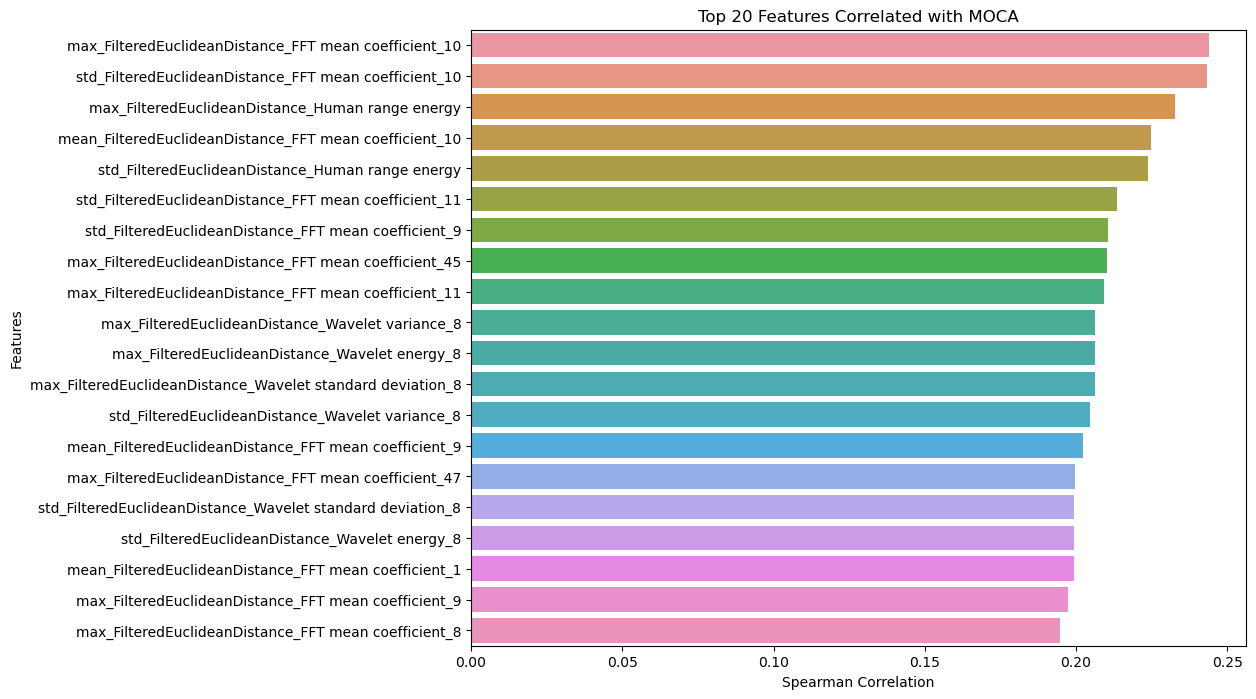

In [4]:
# Select the top N features by absolute correlation value
N = 20  # Adjust N as needed
top_features = corr_p_values_df.sort_values(by='Correlation', ascending=False).head(N)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(data=top_features, x='Correlation', y='Feature')
plt.title(f'Top {N} Features Correlated with MOCA')
plt.xlabel('Spearman Correlation')
plt.ylabel('Features')
plt.show()


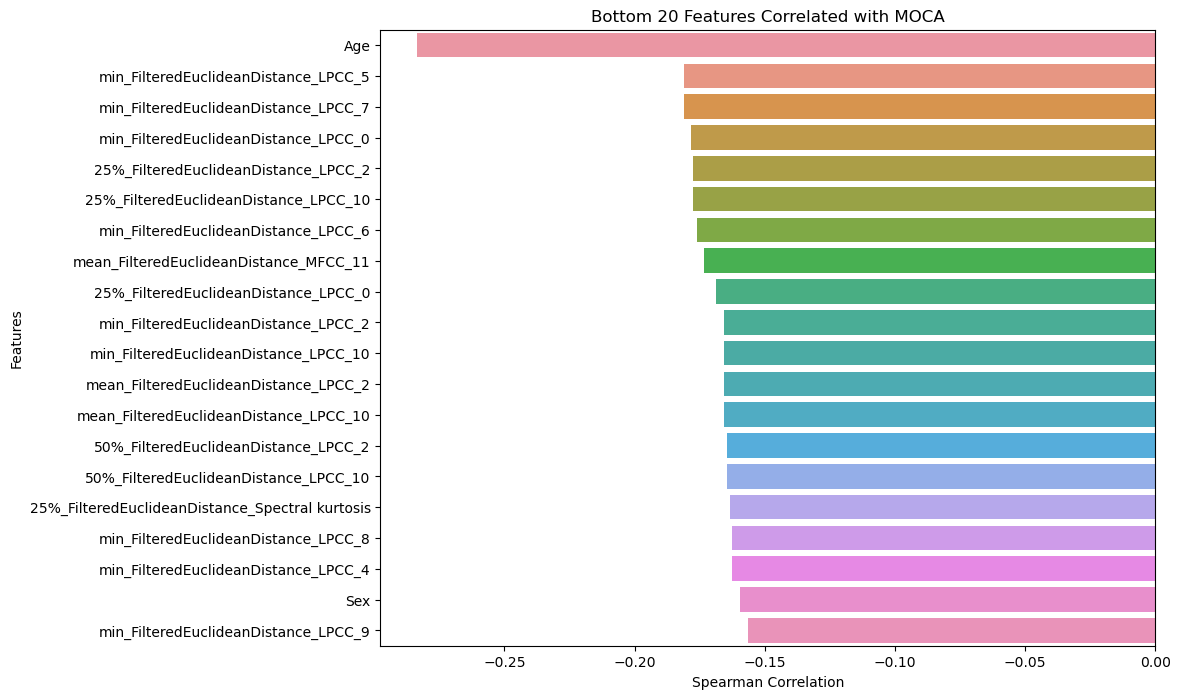

In [5]:
# Select the top N features by absolute correlation value
N = 20  # Adjust N as needed
top_features = corr_p_values_df.sort_values(by='Correlation', ascending=True).head(N)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(data=top_features, x='Correlation', y='Feature')
plt.title(f'Bottom {N} Features Correlated with MOCA')
plt.xlabel('Spearman Correlation')
plt.ylabel('Features')
plt.show()


In [22]:
import pandas as pd
from scipy.stats import pearsonr
import numpy as np
import warnings

# Load the dataset
file_path = "D:\Parkinson's\Feature extraction\Features_Extraction_5mins_overlap\TSFEL_features_5mins_overlap_combine.xlsx"
data = pd.read_excel(file_path)

# Drop the 'Date' column if it exists
if 'Date' in data.columns:
    data.drop(columns=['Date'], inplace=True)

# Suppress NearConstantInputWarning from scipy
warnings.filterwarnings('ignore', category=UserWarning, message='NearConstantInputWarning')

# Select only numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()

# Adjust the variance threshold here
variance_threshold = 0.005  # Lowered threshold

# Filter for features with variance above the threshold
high_variance_cols = [col for col in numeric_cols if data[col].var() > variance_threshold]

# Initialize list to hold correlation data
corr_data = []

# Check if 'MOCA' is in your high variance columns and is numeric
if 'MOCA' in data.columns and data['MOCA'].dtype.kind in 'bifc':  # b=bool, i=int, f=float, c=complex
    for feature in high_variance_cols:
        if feature != 'MOCA':  # Avoid comparing 'MOCA' to itself
            # Ensure no attempt to correlate constant columns
            if len(data[feature].unique()) > 1:
                correlation, p_value = pearsonr(data['MOCA'], data[feature])
                corr_data.append({'Feature': feature, 'Correlation': correlation, 'P-value': p_value})
            else:
                corr_data.append({'Feature': feature, 'Correlation': np.nan, 'P-value': np.nan})
else:
    print("'MOCA' column not found or is not numeric.")

# Convert list of dictionaries to DataFrame for the correlation results
corr_p_values_df = pd.DataFrame(corr_data)

# Filter or sort based on your criteria, e.g., significance or correlation magnitude
significant_corr = corr_p_values_df[corr_p_values_df['P-value'] < 0.05].sort_values(by='Correlation', ascending=False)

# Specify the path to save the filtered data
file_path_to_save = "D:/Parkinson's/Spearman correlation_overlap/Final/Significant_Correlations_Pearson.xlsx"
significant_corr.to_excel(file_path_to_save, index=False)

print("Correlation analysis completed and saved to:", file_path_to_save)




Correlation analysis completed and saved to: D:/Parkinson's/Spearman correlation_overlap/Final/Significant_Correlations_Pearson.xlsx


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

for col in data.columns:
    if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

# Now, select features excluding 'MOCA' for X, and use 'MOCA' as the target variable Y
X = data.drop('MOCA', axis=1)
Y = data['MOCA']

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=6)

# Define the scorer, here Mean Squared Error (MSE) for regression tasks
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Apply 10-Fold Cross-Validation
cv_scores = cross_val_score(rf_model, X, Y, cv=10, scoring=scorer)

# Calculate mean and standard deviation of CV scores
cv_scores_mean = np.mean(cv_scores)
cv_scores_std = np.std(cv_scores)

print(f"CV Scores Mean: {cv_scores_mean}")
print(f"CV Scores Std: {cv_scores_std}")


CV Scores Mean: -7.976105954415955
CV Scores Std: 3.188862833423145


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


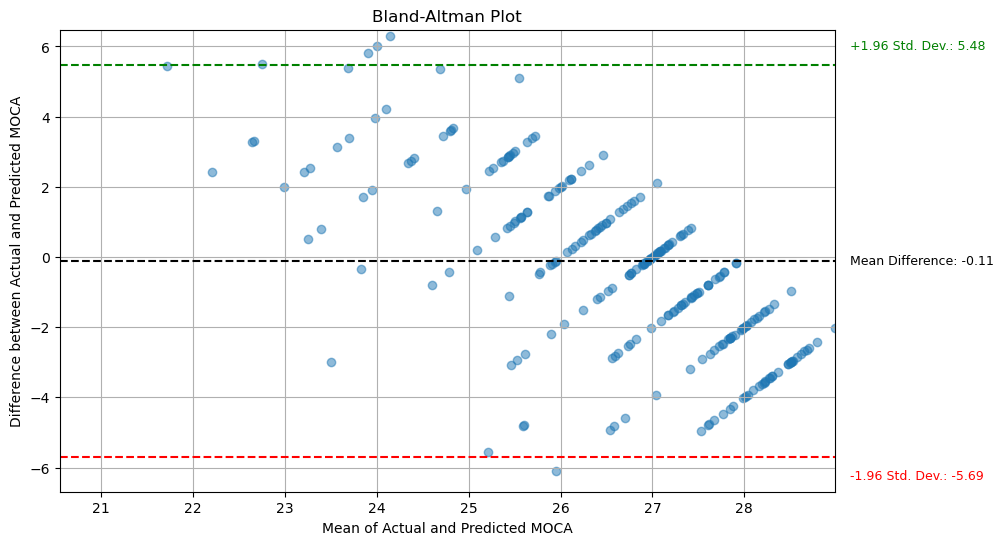

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming Y and predictions are defined elsewhere in your code

# Calculate differences and means
differences = predictions - Y
means = (predictions + Y) / 2
mean_difference = np.mean(differences)
std_difference = np.std(differences)
upper_limit = mean_difference + 1.96 * std_difference
lower_limit = mean_difference - 1.96 * std_difference

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))  # Use subplots for more control
ax.scatter(means, differences, alpha=0.5)

# Mean difference line
ax.axhline(mean_difference, color='black', linestyle='--')
# Upper and lower limits of agreement lines
ax.axhline(upper_limit, color='green', linestyle='--')
ax.axhline(lower_limit, color='red', linestyle='--')

# Adjusting the axis limits to create space
ax.set_xlim([np.min(means), np.max(means)])
ax.set_ylim([lower_limit - 1, upper_limit + 1])

# Adding text outside the Axes area, aligned at the top, middle, and bottom positions on the right
ax.text(1.02, 0.5, f'Mean Difference: {mean_difference:.2f}', va='center', ha='left', transform=ax.transAxes, fontsize=9)
ax.text(1.02, 0.98, f'+1.96 Std. Dev.: {upper_limit:.2f}', va='top', ha='left', transform=ax.transAxes, color='green', fontsize=9)
ax.text(1.02, 0.02, f'-1.96 Std. Dev.: {lower_limit:.2f}', va='bottom', ha='left', transform=ax.transAxes, color='red', fontsize=9)

# Set labels and title
ax.set_xlabel('Mean of Actual and Predicted MOCA')
ax.set_ylabel('Difference between Actual and Predicted MOCA')
ax.set_title('Bland-Altman Plot')
ax.grid(True)

# Hide the original legend
ax.legend().set_visible(False)

plt.show()



In [12]:
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd


label_encoders = {}
for column in data.columns:
    if data[column].dtype == object:  # Corrected dtype check
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le  # Store the label encoder for each column

X = data.drop('MOCA', axis=1)  # Features
Y = data['MOCA']  # Target variable

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=10)

# cross-validated predictions
predictions = cross_val_predict(rf_model, X, Y, cv=10)

# Evaluate the model
mse = mean_squared_error(Y, predictions)
rmse_mean = np.sqrt(mse)
r2 = r2_score(Y, predictions)

print(f"RMSE Scores Mean: {rmse_mean}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Comparing the actual and predicted values
comparison = np.column_stack((Y, predictions))
print("Actual vs Predicted:\n", comparison[:10])



RMSE Scores Mean: 2.8506509091890937
Mean Squared Error (MSE): 8.126210606060607
R-squared (R²): 0.037914442383349956
Actual vs Predicted:
 [[25.   26.14]
 [22.   23.99]
 [26.   26.77]
 [30.   26.54]
 [26.   26.82]
 [28.   22.43]
 [27.   27.04]
 [27.   26.94]
 [26.   25.53]
 [25.   22.  ]]


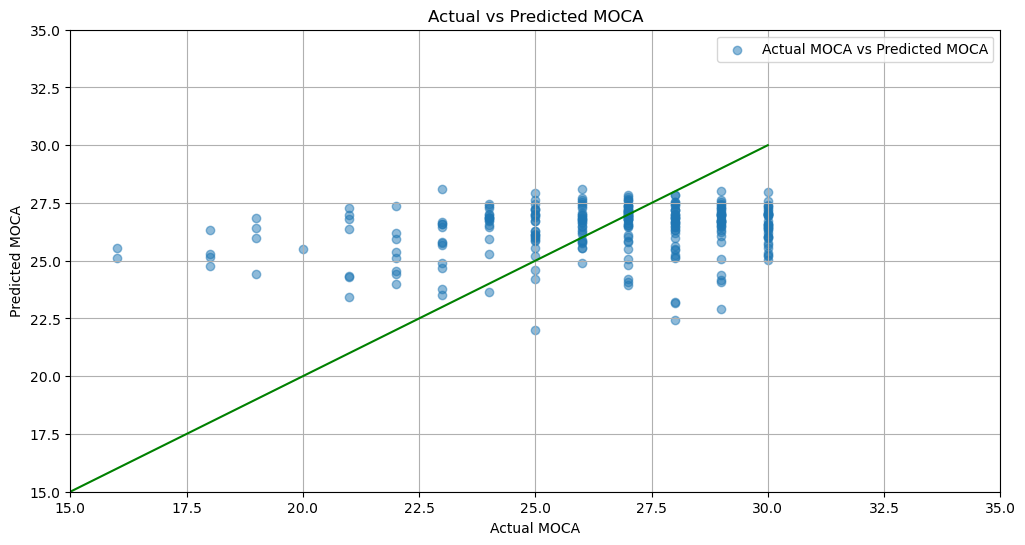

In [13]:
# Scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(Y, predictions, alpha=0.5, label='Actual MOCA vs Predicted MOCA')

# Diagonal line
max_val = max(np.max(Y), np.max(predictions))
plt.plot([0, max_val], [0, max_val], color="green", linestyle='-')

plt.xlim(15,35)
plt.ylim(15,35)

plt.xlabel('Actual MOCA')
plt.ylabel('Predicted MOCA')
plt.title('Actual vs Predicted MOCA')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming `data` is your DataFrame and it has been properly prepared
X = data.drop('MOCA', axis=1)  # Features: Drop the target variable column from `data`
Y = data['MOCA']  # Target variable

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=6)

# Define multiple scorers
scoring = {'MSE': 'neg_mean_squared_error', 
           'MAE': 'neg_mean_absolute_error', 
           'R2': 'r2'}

# Apply 10-Fold Cross-Validation with multiple scoring metrics
cv_results = cross_validate(rf_model, X, Y, cv=10, scoring=scoring)

# Calculate mean and standard deviation of CV scores for each metric
for metric in scoring.keys():
    mean_score = np.mean(cv_results[f'test_{metric}'])
    std_score = np.std(cv_results[f'test_{metric}'])
    print(f"{metric} Mean: {mean_score}, Std: {std_score}")


MSE Mean: -8.372387076023392, Std: 3.8402369009431556
MAE Mean: -2.2376432748538013, Std: 0.5508404538226337
R2 Mean: -0.051765910934254644, Std: 0.2586499921247799


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming 'data_rf' is your DataFrame and 'MOCA' is the target variable
X = data.drop(['MOCA', "Parkinson's Vs Control"], axis=1)  # Features
y = data['MOCA']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf.predict(X_test)

# Evaluating the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'R^2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')



R^2 Score: 0.019046345430517087
Mean Absolute Error: 2.106415094339623
Root Mean Squared Error: 2.621167102863165


In [4]:
import matplotlib.pyplot as plt
import numpy as np

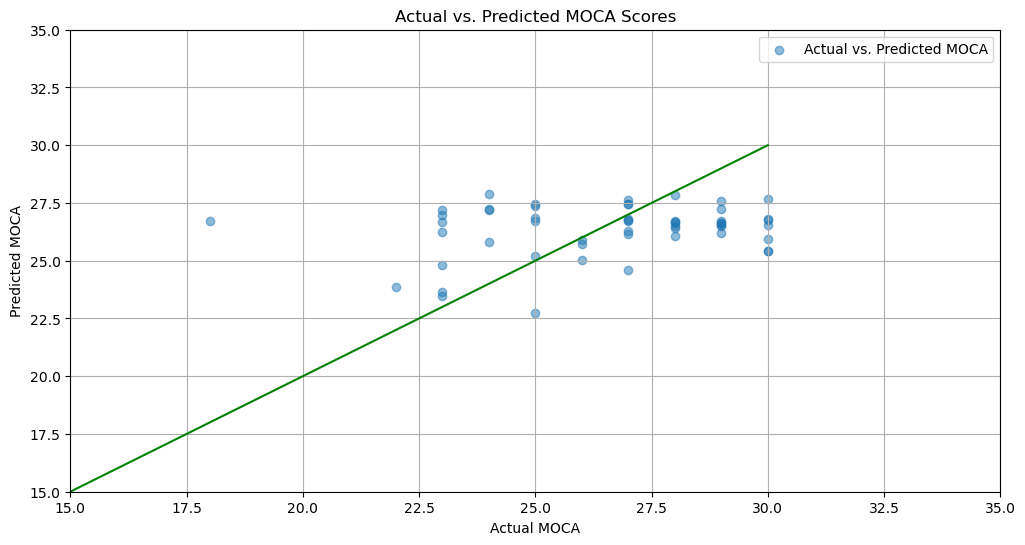

In [6]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Actual vs. Predicted MOCA')

# Drawing a diagonal line to represent perfect predictions
max_val = max(np.max(y_test), np.max(y_pred))
plt.plot([0, max_val], [0, max_val], color="green", linestyle='-')

# Setting the limits for better visualization based on your MOCA score range
plt.xlim(15, 35)
plt.ylim(15, 35)

# Adding labels, title, and legend for clarity
plt.xlabel('Actual MOCA')
plt.ylabel('Predicted MOCA')
plt.title('Actual vs. Predicted MOCA Scores')
plt.legend()
plt.grid(True)

plt.show() 

In [6]:
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame and 'MOCA' is the target variable
features = data.drop(['MOCA', 'PatientNumber', 'Age', 'Sex', 'EDUCATION YEARS', "Parkinson's Vs Control"], axis=1)
target = data['MOCA']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the features and transform them
features_normalized = scaler.fit_transform(features)

# Now you can follow the usual train-test split and model training process:
X_train_norm, X_test_norm, y_train, y_test = train_test_split(features_normalized, target, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_norm = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the normalized feature data
rf_norm.fit(X_train_norm, y_train)

# Calculate RMSE

# Predict and evaluate the model as before
y_pred_norm = rf_norm.predict(X_test_norm)
rmse_norm = mean_squared_error(y_test, y_pred_norm, squared=False)
r2_norm = r2_score(y_test, y_pred_norm)

# Print the R^2 score and RMSE
print(f'Normalized Data R^2 Score: {r2_norm:.4f}')
print(f'Normalized Data RMSE: {rmse_norm:.4f}')


Normalized Data R^2 Score: -0.0113
Normalized Data RMSE: 2.6615


In [11]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Perform 10-fold cross-validation for R^2 score
cv_r2_scores = cross_val_score(gbr, features_normalized, target, cv=5, scoring='r2')

# Calculate the mean R^2 score across all folds
mean_cv_r2 = np.mean(cv_r2_scores)

# Perform 10-fold cross-validation for RMSE
cv_rmse_scores = cross_val_score(gbr, features_normalized, target, cv=10, scoring='neg_mean_squared_error')

# Calculate the mean RMSE across all folds
mean_cv_rmse = np.mean(np.sqrt(-cv_rmse_scores))

print(f'Gradient Boosting - 10-fold CV Mean R^2 Score: {mean_cv_r2:.4f}')
print(f'Gradient Boosting - 10-fold CV Mean RMSE: {mean_cv_rmse:.4f}')


Gradient Boosting - 10-fold CV Mean R^2 Score: -0.1606
Gradient Boosting - 10-fold CV Mean RMSE: 2.9903


In [10]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize the Random Forest regressor
rf = RandomForestRegressor(random_state=42)

# Setup the random search with 5-fold cross-validation
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                               n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
rf_random.fit(X_train_norm, y_train)

# Evaluate the best model from random search
best_random = rf_random.best_estimator_
y_pred_best = best_random.predict(X_test_norm)
r2_best = r2_score(y_test, y_pred_best)
rmse_best = mean_squared_error(y_test, y_pred_best, squared=False)

print(f'Best R^2 Score: {r2_best}')
print(f'Best RMSE: {rmse_best}')


Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\upama\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
255 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
216 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\upama\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\upama\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\upama\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\upama\anaconda3\Lib\site-packag

Best R^2 Score: 0.06537391743366316
Best RMSE: 2.5585235115323375


In [24]:
from sklearn.model_selection import LeaveOneGroupOut, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression

# Assuming 'X' is your features dataframe, 'y' is your target series, and 'groups' is an array-like indicating group membership for cross-validation
logo = LeaveOneGroupOut()

# Create a pipeline with feature scaling, feature selection, and model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(score_func=f_regression)),
    ('model', RandomForestRegressor(random_state=42))
])

# Define hyperparameters for Random Forest and hyperparameter grid
param_grid = {
    'model__n_estimators': [50, 100, 150],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
}

# Scoring function using RMSE
scoring = make_scorer(mean_squared_error, greater_is_better=False, squared=False)

# Perform nested LOSO CV with hyperparameter tuning and feature selection
selected_features_list = []
rmse_list = []
r2_list = []
# Assuming 'data_rf' is your DataFrame and 'MOCA' is the target variable
X = data.drop(['MOCA', "Parkinson's Vs Control"], axis=1)  # Features
y = data['MOCA']  # Target variable
groups = data['PatientNumber'].values


for train_index, test_index in logo.split(X, y, groups=groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, scoring=scoring, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Access the best model and selected features
    best_model = grid_search.best_estimator_
    selected_features = X.columns[best_model.named_steps['feature_selection'].get_support(indices=True)]
    selected_features_list.append(selected_features)

    # Evaluate the model on the test set
    y_pred = best_model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    rmse_list.append(rmse)
    r2_list.append(r2)
    # Print results for the current iteration
    print(f'Iteration Results:')
    print(f'RMSE: {rmse:.4f}')
    print(f'R^2: {r2:.4f}')
    print(f'Selected Features: {selected_features}\n')
    
# summary after all iterations:
print(f'Average RMSE: {sum(rmse_list) / len(rmse_list):.4f}')
print(f'Average R^2: {sum(r2_list) / len(r2_list):.4f}')
print('Features selected in each iteration:')
for idx, features in enumerate(selected_features_list, 1):
    print(f'Iteration {idx}: {features}')

C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 2.6090
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       'mean_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.3387
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.3834
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 2.9187
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.9240
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 3.6995
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 6.0082
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.4778
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.3296
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.8085
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 2.2455
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       'mean_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 4.0137
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       'mean_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       'mean_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.4961
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 2.2675
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.6532
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       'mean_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.1495
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.4244
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       'mean_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       'mean_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.4307
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       'mean_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       'mean_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 2.6703
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       'mean_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_10',
       'mean_FilteredEuclideanDistance_LPCC_2',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.0054
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 2.5048
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       'mean_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       'mean_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.7541
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.9893
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       'mean_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       'mean_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 3.4309
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       'mean_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_10',
       'mean_FilteredEuclideanDistance_LPCC_2',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 2.9084
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       'mean_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       'mean_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 2.1563
R^2: nan
Selected Features: Index(['75%_FilteredEuclideanDistance_FFT mean coefficient_9',
       '25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 7.5243
R^2: nan
Selected Features: Index(['75%_FilteredEuclideanDistance_FFT mean coefficient_9',
       '25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '50%_FilteredEuclideanDistance_Spectral positive turning points',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 4.9251
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       'mean_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_10',
       'mean_FilteredEuclideanDistance_LPCC_2',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 5.5843
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       'mean_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_10',
       'mean_FilteredEuclideanDistance_LPCC_2',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.6239
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.6773
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       'mean_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       'mean_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 5.7778
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 2.8689
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 3.2165
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 2.4281
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 7.1381
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       'mean_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_10',
       'mean_FilteredEuclideanDistance_LPCC_2',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '50%_FilteredEuclideanDistance_Spectral positive turning points',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 2.9024
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.8686
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       'mean_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.4418
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.3128
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       'mean_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       'mean_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 5.6796
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       'mean_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       'mean_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.5191
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 4.7061
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       'mean_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       'mean_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.1625
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 10.5657
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.0125
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 4.2679
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '50%_FilteredEuclideanDistance_Spectral positive turning points',
       'mean_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.7505
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 3.0308
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 3.7582
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       'mean_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '50%_FilteredEuclideanDistance_Spectral positive turning points',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 8.0891
R^2: nan
Selected Features: Index(['75%_FilteredEuclideanDistance_FFT mean coefficient_9',
       '25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       'mean_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.4950
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 3.2384
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       'mean_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       'mean_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.3982
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 2.0755
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 2.6027
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.9616
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.5691
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 3.9166
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.4222
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 2.4269
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 2.1194
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.4348
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       'mean_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       'mean_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.0822
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 2.9258
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 4.0457
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.5362
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.8900
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       'mean_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       'mean_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.0383
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.6391
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.4831
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.9412
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 2.4274
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.1742
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 3.7463
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.1830
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.1033
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 3.7182
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 3.3106
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 2.4944
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.5450
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 3.5736
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.6261
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.1655
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 4.5579
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       'mean_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 5.8395
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       'mean_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       'mean_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.0319
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 2.4095
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       'mean_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 3.2000
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       'mean_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       'mean_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.8666
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 2.3642
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 4.7987
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '50%_FilteredEuclideanDistance_Spectral positive turning points',
       'mean_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 8.4693
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.1396
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 4.7758
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '50%_FilteredEuclideanDistance_Spectral positive turning points',
       'mean_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.8058
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       'mean_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       'mean_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.1698
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.8411
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.3098
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 7.1412
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       'mean_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       'mean_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 7.3720
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       'mean_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '50%_FilteredEuclideanDistance_Spectral positive turning points',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 3.5259
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.5890
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.1300
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 3.1127
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '50%_FilteredEuclideanDistance_Spectral positive turning points',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.4286
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 3.1373
R^2: nan
Selected Features: Index(['75%_FilteredEuclideanDistance_FFT mean coefficient_9',
       '25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.1190
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.5537
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 2.2052
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       'mean_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       'mean_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.9114
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 3.3519
R^2: nan
Selected Features: Index(['75%_FilteredEuclideanDistance_FFT mean coefficient_9',
       '25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '50%_FilteredEuclideanDistance_Spectral positive turning points',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 2.1761
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.6029
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.8588
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       'mean_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       'mean_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 3.1949
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.3345
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.4977
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 5.1190
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.7052
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.1941
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 4.3799
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 4.3221
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       'mean_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_10',
       'mean_FilteredEuclideanDistance_LPCC_2',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.6741
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 2.5637
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 2.5567
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 3.1838
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 3.8580
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       'mean_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       'mean_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 5.1962
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.8968
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 4.0992
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       'mean_FilteredEuclideanDistance_LPCC_2',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       'mean_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.9189
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 3.2419
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.4546
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.8282
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.4190
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 3.8464
R^2: nan
Selected Features: Index(['75%_FilteredEuclideanDistance_FFT mean coefficient_9',
       '25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.6673
R^2: nan
Selected Features: Index(['std_FilteredEuclideanDistance_Human range energy',
       'max_FilteredEuclideanDistance_Human range energy',
       '25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       'max_FilteredEuclideanDistance_Wavelet energy_8',
       'max_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.4599
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.2281
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.2095
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       'mean_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 2.0206
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.0718
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.1124
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.5504
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 3.5257
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 4.8042
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.7438
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 3.6207
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.4142
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 3.9286
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.5731
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.8408
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 3.4577
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       'mean_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       'mean_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 2.2617
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       'mean_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 4.2989
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       'mean_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       'mean_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 2.8143
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.9262
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.9760
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.6503
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       'mean_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       'mean_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.6173
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 3.2661
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       'mean_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       'mean_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.3690
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.6738
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       'mean_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_10',
       'mean_FilteredEuclideanDistance_LPCC_2',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 3.8172
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.2940
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 4.3933
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       'mean_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       'mean_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 2.7927
R^2: nan
Selected Features: Index(['75%_FilteredEuclideanDistance_FFT mean coefficient_9',
       '25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       'mean_FilteredEuclideanDistance_LPCC_2',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.0453
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 2.1731
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       'mean_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_10',
       'mean_FilteredEuclideanDistance_LPCC_2',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.9627
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       'mean_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_10',
       'mean_FilteredEuclideanDistance_LPCC_2',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.6154
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 4.6613
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.0475
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 2.2029
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       'mean_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.7520
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.8481
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       'mean_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_10',
       'mean_FilteredEuclideanDistance_LPCC_2',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 2.2404
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 2.5495
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       'mean_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_10',
       'mean_FilteredEuclideanDistance_LPCC_2',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.1236
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.5177
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       'mean_FilteredEuclideanDistance_LPCC_2',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       'mean_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.6711
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.9770
R^2: nan
Selected Features: Index(['75%_FilteredEuclideanDistance_FFT mean coefficient_9',
       '25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 7.7456
R^2: nan
Selected Features: Index(['75%_FilteredEuclideanDistance_FFT mean coefficient_9',
       '25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 4.8785
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       'mean_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_10',
       'mean_FilteredEuclideanDistance_LPCC_2',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 5.8811
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       'mean_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_10',
       'mean_FilteredEuclideanDistance_LPCC_2',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 3.2013
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 2.4563
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 2.8850
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.0159
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.4923
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.6292
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.1384
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 2.4924
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '50%_FilteredEuclideanDistance_Spectral positive turning points',
       'mean_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.5345
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 2.6643
R^2: nan
Selected Features: Index(['75%_FilteredEuclideanDistance_FFT mean coefficient_9',
       '25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 3.1942
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       'mean_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_10',
       'mean_FilteredEuclideanDistance_LPCC_2',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.3825
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 2.5325
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.1313
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 2.8185
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       'mean_FilteredEuclideanDistance_LPCC_2',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       'mean_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')

Iteration Results:
RMSE: 1.2961
R^2: 0.0000
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEucli

C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 2.6281
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       'mean_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       'mean_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.0966
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 2.6494
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 3.0252
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.7367
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       'mean_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       'mean_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.3162
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.8471
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       'mean_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.2628
R^2: nan
Selected Features: Index(['75%_FilteredEuclideanDistance_FFT mean coefficient_9',
       '25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 4.3178
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.9709
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.6243
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 3.0264
R^2: nan
Selected Features: Index(['75%_FilteredEuclideanDistance_FFT mean coefficient_9',
       '25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 2.2103
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 3.0980
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       'mean_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       'mean_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 2.3705
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.4578
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.7328
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.8057
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 3.6115
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.4747
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 2.4341
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 3.0171
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '50%_FilteredEuclideanDistance_Spectral positive turning points',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 3.2048
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       'mean_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_10',
       'mean_FilteredEuclideanDistance_LPCC_2',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.2884
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       'mean_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       'mean_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.4916
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       'mean_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.1803
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.7731
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.5020
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.2341
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 3.4962
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       'mean_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_10',
       'mean_FilteredEuclideanDistance_LPCC_2',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.1010
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 2.7344
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')

Iteration Results:
RMSE: 1.7431
R^2: 0.0000
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       'mean_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       'mean_FilteredEuclideanDistance_Standard deviation'

C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.5688
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 2.4706
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       'mean_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_10',
       'mean_FilteredEuclideanDistance_LPCC_2',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.2054
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.6520
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       'mean_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       'mean_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.8527
R^2: nan
Selected Features: Index(['75%_FilteredEuclideanDistance_FFT mean coefficient_9',
       '75%_FilteredEuclideanDistance_Human range energy',
       '25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 3.0220
R^2: nan
Selected Features: Index(['75%_FilteredEuclideanDistance_FFT mean coefficient_9',
       '25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       'mean_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 2.9921
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 5.2777
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       'mean_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       'mean_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.1172
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       'mean_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       'mean_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.3719
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.7044
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.4006
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 4.4980
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '50%_FilteredEuclideanDistance_Spectral positive turning points',
       'mean_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 4.8478
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 3.1620
R^2: nan
Selected Features: Index(['75%_FilteredEuclideanDistance_FFT mean coefficient_9',
       '25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       'mean_FilteredEuclideanDistance_LPCC_2',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.1967
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 5.7736
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.3467
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 4.9871
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 8.5677
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       'mean_FilteredEuclideanDistance_LPCC_2',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '50%_FilteredEuclideanDistance_Spectral positive turning points',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 2.8213
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       'mean_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       'mean_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 0.6339
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.1049
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_7',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')



C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration Results:
RMSE: 1.8751
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       'mean_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '50%_FilteredEuclideanDistance_Spectral positive turning points',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_8',
       '75%_FilteredEuclideanDistance_Wavelet standard deviation_8', 'Age'],
      dtype='object')

Iteration Results:
RMSE: 0.5484
R^2: nan
Selected Features: Index(['25%_FilteredEuclideanDistance_LPCC_0',
       '25%_FilteredEuclideanDistance_LPCC_10',
       '25%_FilteredEuclideanDistance_LPCC_2',
       '75%_FilteredEuclideanDistance_Mean absolute deviation',
       '75%_FilteredEuclideanDistance_Standard deviation',
       '75%_FilteredEuclideanDistance_Wavelet energy_7'

C:\Users\upama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Load your data
path = 'D://Parkinson\'s/Features_Extraction_5mins_Final/TSFEL_features_Stats_combine.xlsx'
df = pd.read_excel(path)

# Define the selected features
selected_features = [
    '75%_FilteredEuclideanDistance_Standard deviation', '25%_FilteredEuclideanDistance_LPCC_0',
    '25%_FilteredEuclideanDistance_LPCC_2', '75%_FilteredEuclideanDistance_Mean absolute deviation',
    '25%_FilteredEuclideanDistance_LPCC_10','Age'
]

# Filter the dataset to only use selected features
X_filtered = df[selected_features]
y = df['MOCA']  # Target variable

# Splitting the dataset into training and testing sets using the selected features
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42)

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best estimator
best_rf = grid_search.best_estimator_

# Predict on the test set with the best estimator
y_pred = best_rf.predict(X_test)

# Evaluate the best model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Output the best parameters and performance metrics
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best R^2 Score: {r2:.4f}')
print(f'Best Mean Absolute Error: {mae:.4f}')
print(f'Best Root Mean Squared Error: {rmse:.4f}')


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best R^2 Score: 0.0659
Best Mean Absolute Error: 2.0443
Best Root Mean Squared Error: 2.5577


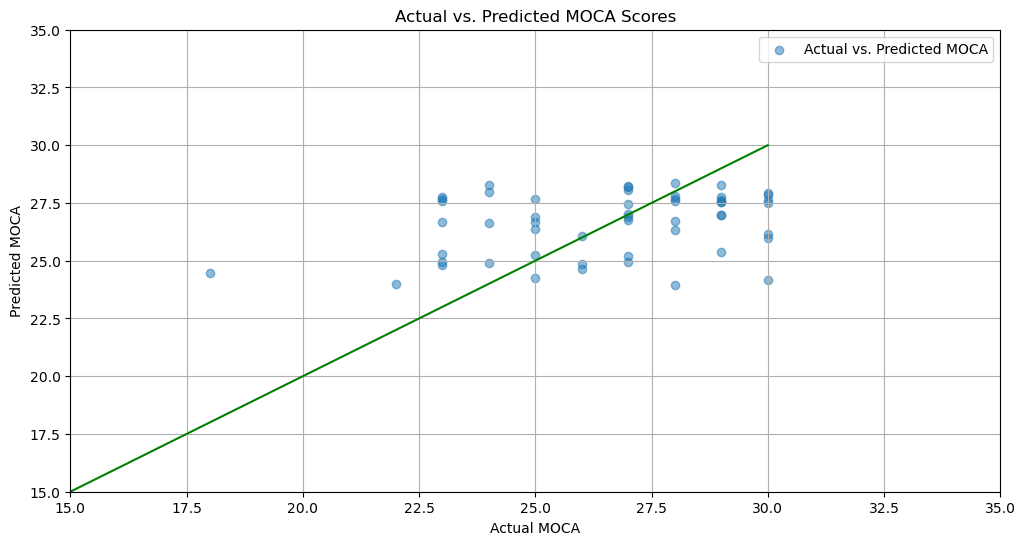

In [45]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Actual vs. Predicted MOCA')

# Drawing a diagonal line to represent perfect predictions
max_val = max(np.max(y_test), np.max(y_pred))
plt.plot([0, max_val], [0, max_val], color="green", linestyle='-')

# Setting the limits for better visualization based on your MOCA score range
plt.xlim(15, 35)
plt.ylim(15, 35)

# Adding labels, title, and legend for clarity
plt.xlabel('Actual MOCA')
plt.ylabel('Predicted MOCA')
plt.title('Actual vs. Predicted MOCA Scores')
plt.legend()
plt.grid(True)

plt.show() 

In [37]:
X


,mean_FilteredEuclideanDistance_Absolute energy,std_FilteredEuclideanDistance_Absolute energy,min_FilteredEuclideanDistance_Absolute energy,25%_FilteredEuclideanDistance_Absolute energy,50%_FilteredEuclideanDistance_Absolute energy,75%_FilteredEuclideanDistance_Absolute energy,max_FilteredEuclideanDistance_Absolute energy,mean_FilteredEuclideanDistance_Area under the curve,std_FilteredEuclideanDistance_Area under the curve,min_FilteredEuclideanDistance_Area under the curve,...,std_FilteredEuclideanDistance_Zero crossing rate,min_FilteredEuclideanDistance_Zero crossing rate,25%_FilteredEuclideanDistance_Zero crossing rate,50%_FilteredEuclideanDistance_Zero crossing rate,75%_FilteredEuclideanDistance_Zero crossing rate,max_FilteredEuclideanDistance_Zero crossing rate,PatientNumber,Age,Sex,EDUCATION YEARS
0,31628.894143,814.231920,28488.597808,31153.791955,31501.400394,32414.553075,33405.744244,306.907243,4.490021,291.268299,...,0.205190,0,0,0,0,2,12593,72.2,0,14
1,30729.380229,361.572933,29907.610440,30440.377990,30805.087500,30927.219300,31903.260930,303.219734,1.418990,299.512060,...,0.205190,0,0,0,0,2,13039,72.6,1,18
2,32308.126681,1420.599038,27835.270840,31658.078620,32603.662170,33139.604365,35755.580090,309.953654,6.253536,288.948484,...,0.000000,0,0,0,0,0,14281,67.9,0,13
3,32533.088445,1072.525976,29102.120390,31949.348411,32573.276186,33128.299950,35257.815813,310.811592,4.273272,295.405584,...,0.000000,0,0,0,0,0,14331,67.9,0,19
4,32296.261594,3823.488482,29164.434172,30560.649624,30983.937246,31449.635460,48043.226691,310.131544,17.393240,295.731127,...,0.000000,0,0,0,0,0,18567,64.9,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,30155.398279,1292.027164,27786.337317,29184.337729,30159.215009,30961.490986,33563.859268,299.559516,5.398971,288.674097,...,0.000000,0,0,0,0,0,75508,59.1,0,16
260,30352.086712,1310.033755,28421.491233,29464.771889,29890.148111,31064.117464,36080.044251,299.197874,4.432178,291.815244,...,0.488987,0,0,0,0,2,75512,52.1,0,19
261,29897.912603,1157.569763,28677.693686,29312.119163,29631.022197,30084.710757,34496.791348,298.126576,4.147076,293.065601,...,0.288626,0,0,0,0,2,75547,53.8,1,19
262,30379.485079,248.288663,29647.611529,30243.825095,30407.538998,30484.769293,31649.132402,301.461651,1.194904,297.551503,...,0.205190,0,0,0,0,2,90456,88.5,1,18
